In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [3]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics of the dataset
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.3432

In [4]:
# Identify missing values for all columns
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


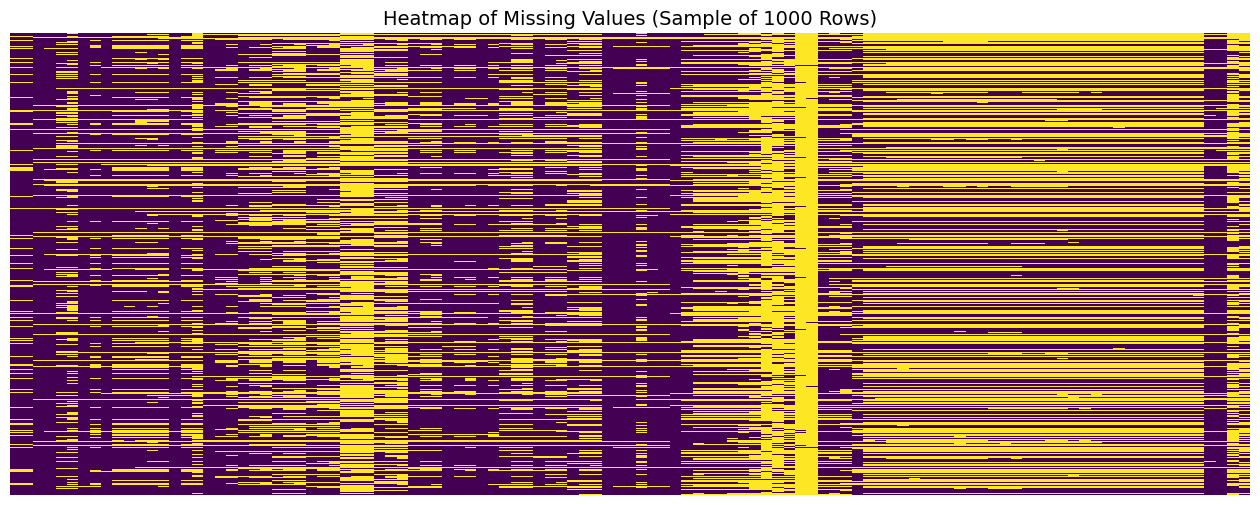

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns with missing values
missing_cols = df.columns[df.isnull().any()]

# Sample 1000 rows for better readability
sampled_df = df[missing_cols].sample(1000, random_state=1)

# Plot heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(sampled_df.isnull(), cmap="viridis", cbar=False, xticklabels=False, yticklabels=False)

plt.title("Heatmap of Missing Values (Sample of 1000 Rows)", fontsize=14)
plt.show()


In [11]:
missing_employment = df['Employment'].isnull().sum()
print("Number of missing rows in 'Employment':", missing_employment)


Number of missing rows in 'Employment': 0


In [12]:
most_frequent_employment = df['Employment'].mode()[0]
print("Most frequent value in 'Employment':", most_frequent_employment)


Most frequent value in 'Employment': Employed, full-time


In [14]:
# Find the most frequent value
most_frequent_employment = df['Employment'].mode()[0]

# Fill missing values and assign it back to the column
df['Employment'] = df['Employment'].fillna(most_frequent_employment)


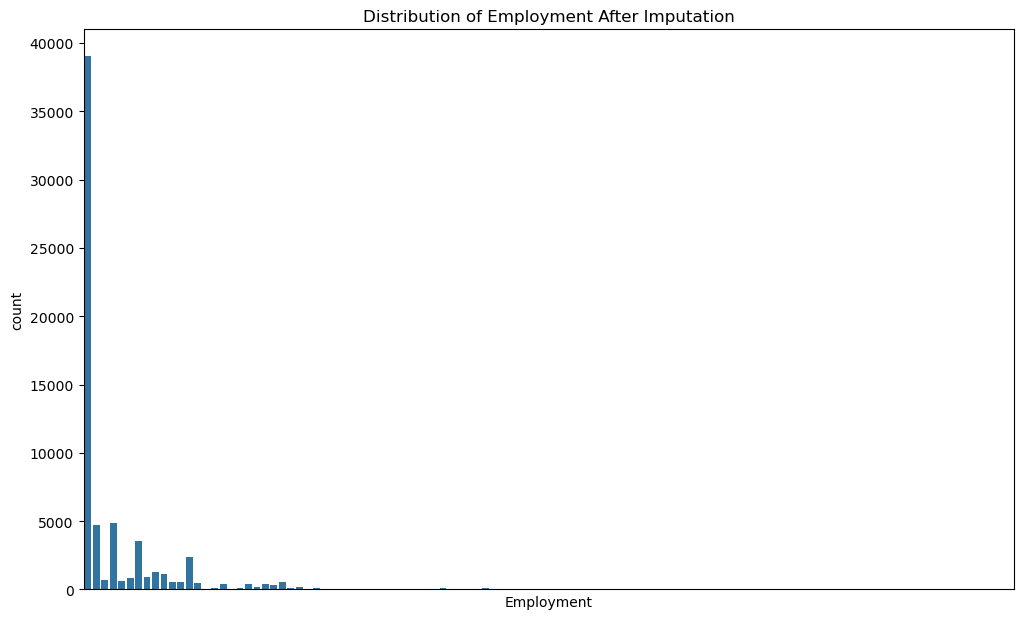

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the 'Employment' column after imputation
plt.figure(figsize=(12, 8))  # Increase figure size
sns.countplot(data=df, x='Employment')  # No need for 'palette' argument

# Remove x-axis labels
plt.xticks([], [])

# Increase the bottom margin and adjust layout
plt.subplots_adjust(bottom=0.2, top=0.9)  # Manually adjust margins to avoid overlap

# Set title
plt.title('Distribution of Employment After Imputation')

# Show the plot
plt.show()
